In [1]:
import pandas as pd
import pandas.io.sql as sqlio
import sqlalchemy as sql
import psycopg2
import matplotlib.pyplot as plt
import numpy as np
import os

from dotenv import load_dotenv
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
   
from sqlalchemy import create_engine

# load up the variables from the .env file.
load_dotenv()

True

In [2]:
# set the variables for the pull from SQL.  username and password are in an .env file.  You will need those to make this run
# on your machine.

host = 'localhost'
port = 5432
dbname='Company'
username = os.environ.get('USER_NAME')
pwd = os.environ.get('PASSWORD')


In [3]:
# Pull the salaries from the salary table.  I do not verify that there is an employee ID, but the foreign
# keys should keep me straight.

conn = psycopg2.connect("host='{}' port={} dbname='{}' user={} password={}".format(host, port, dbname, username, pwd))
sql = "Select salary from salaries;"
dat = sqlio.read_sql_query(sql, conn)

# close the connection
conn = None

In [4]:
# Put salaries into dataframe.
salary_df = pd.DataFrame(dat)
salary_df

,salary
0,"$60,117.00"
1,"$65,828.00"
2,"$40,006.00"
3,"$40,054.00"
4,"$78,228.00"
...,...
300019,"$40,000.00"
300020,"$58,058.00"
300021,"$49,597.00"
300022,"$40,000.00"


In [12]:
# Need to remove the $ and , so that we can conver to a float and make it easier to graph

salary_df['salary']=salary_df['salary'].replace('[\$,]', '', regex=True).astype(float)

salary_df.dtypes

salary    float64
dtype: object

(array([1.13617e+05, 1.88640e+04, 1.92620e+04, 1.89190e+04, 1.81420e+04,
        1.67180e+04, 1.52690e+04, 1.37730e+04, 1.20560e+04, 1.06200e+04,
        9.11000e+03, 7.58300e+03, 6.49900e+03, 5.10900e+03, 3.95700e+03,
        3.09700e+03, 2.37700e+03, 1.73500e+03, 1.20500e+03, 7.58000e+02,
        5.24000e+02, 3.23000e+02, 2.13000e+02, 1.33000e+02, 6.80000e+01,
        5.20000e+01, 2.30000e+01, 1.00000e+01, 4.00000e+00, 4.00000e+00]),
 array([ 40000.        ,  42983.06666667,  45966.13333333,  48949.2       ,
         51932.26666667,  54915.33333333,  57898.4       ,  60881.46666667,
         63864.53333333,  66847.6       ,  69830.66666667,  72813.73333333,
         75796.8       ,  78779.86666667,  81762.93333333,  84746.        ,
         87729.06666667,  90712.13333333,  93695.2       ,  96678.26666667,
         99661.33333333, 102644.4       , 105627.46666667, 108610.53333333,
        111593.6       , 114576.66666667, 117559.73333333, 120542.8       ,
        123525.86666667, 126

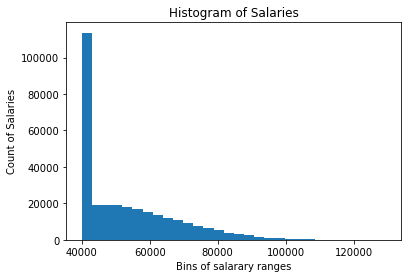

In [15]:
# Seting to 30 bins
n_bins= 30

fig,ax = plt.subplots(1,1)

# Provide the salaries
y = salary_df['salary']

# Label the graphs
ax.set_title("Histogram of Salaries")
ax.set_xlabel("Bins of salarary ranges")
ax.set_ylabel("Count of Salaries")

# We can set the number of bins with the `bins` kwarg
ax.hist(y, bins=n_bins)


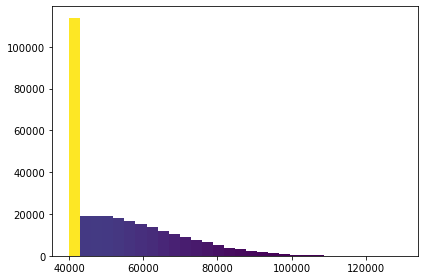

In [26]:
fig, axs = plt.subplots( tight_layout=True)


# N is the count in each bin, bins is the lower-limit of the bin
N, Nbins, patches = axs.hist(y, bins=n_bins)

# We'll color code by height, but you could use any scalar
fracs = N / N.max()

# we need to normalize the data to 0..1 for the full range of the colormap
norm = colors.Normalize(fracs.min(), fracs.max())

# Now, we'll loop through our objects and set the color of each accordingly
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
    



In [46]:
# Lets remove the lower salaries which are skewing the curve
upper_salary_df = salary_df.loc[salary_df['salary'] >= 41000]

(array([1.0892e+04, 1.1116e+04, 1.1262e+04, 1.1413e+04, 1.1457e+04,
        1.1237e+04, 1.0938e+04, 1.0534e+04, 1.0074e+04, 9.5050e+03,
        8.9730e+03, 8.4840e+03, 7.8960e+03, 7.2920e+03, 6.8360e+03,
        6.2100e+03, 5.7950e+03, 5.1620e+03, 4.6550e+03, 4.2620e+03,
        3.8340e+03, 3.2870e+03, 2.9480e+03, 2.4320e+03, 2.1920e+03,
        1.8500e+03, 1.5840e+03, 1.3400e+03, 1.1290e+03, 9.1200e+02,
        7.4200e+02, 5.6000e+02, 4.3000e+02, 3.3800e+02, 2.6700e+02,
        1.9900e+02, 1.6500e+02, 1.2200e+02, 8.9000e+01, 6.3000e+01,
        4.3000e+01, 4.3000e+01, 2.3000e+01, 1.7000e+01, 1.2000e+01,
        7.0000e+00, 5.0000e+00, 2.0000e+00, 3.0000e+00, 1.0000e+00]),
 array([ 41000.  ,  42769.84,  44539.68,  46309.52,  48079.36,  49849.2 ,
         51619.04,  53388.88,  55158.72,  56928.56,  58698.4 ,  60468.24,
         62238.08,  64007.92,  65777.76,  67547.6 ,  69317.44,  71087.28,
         72857.12,  74626.96,  76396.8 ,  78166.64,  79936.48,  81706.32,
         83476.16,  85

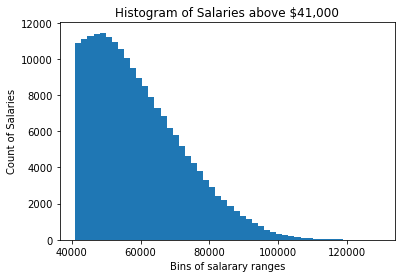

In [48]:
# Seting to 50 bins
n_bins= 50

fig,ax = plt.subplots(1,1)

# Provide the salaries
y = upper_salary_df['salary']

# Label the graphs
ax.set_title("Histogram of Salaries above $41,000")
ax.set_xlabel("Bins of salarary ranges")
ax.set_ylabel("Count of Salaries")

# We can set the number of bins with the `bins` kwarg
plt.hist(y, bins=n_bins)

In [49]:
# Lets get the deprtments and the salaries in those departments.  I did see that an employee belongs to 2 departments.  I 
# didn't correct that.  Just used the data as is.  Here is the select statement.

# Select distinct d.name, s.salary from departments d 
#     inner join dept_emp de on d.dept_no = de.dept_no 
#     inner join employees e on de.employee_no = e.employee_no 
#     inner join salaries s on e.employee_no = s.employee_no;

conn = psycopg2.connect("host='{}' port={} dbname='{}' user={} password={}".format(host, port, dbname, username, pwd))
sql = "Select distinct d.name, s.salary from departments d inner join dept_emp de on d.dept_no = de.dept_no inner join employees e on de.employee_no = e.employee_no inner join salaries s on e.employee_no = s.employee_no;"
dat = sqlio.read_sql_query(sql, conn)

# close the connections
conn = None

In [50]:
# put data into a dataframe
df = pd.DataFrame(dat)
df

,name,salary
0,Customer Service,"$40,000.00"
1,Customer Service,"$40,001.00"
2,Customer Service,"$40,003.00"
3,Customer Service,"$40,006.00"
4,Customer Service,"$40,010.00"
...,...,...
147868,Sales,"$125,469.00"
147869,Sales,"$126,703.00"
147870,Sales,"$127,041.00"
147871,Sales,"$127,238.00"


In [51]:
# Need to remove the $ and , so that we can conver to a float and make it easier to graph

df['salary']=df['salary'].replace('[\$,]', '', regex=True).astype(float)

df.dtypes

name       object
salary    float64
dtype: object

In [52]:
# Get the salaries per department
df_sal = df.groupby('name')
df_sal['salary'].mean()

name
Customer Service      57353.099198
Development           56580.793077
Finance               62614.431365
Human Resources       52187.073576
Marketing             63881.193240
Production            56293.398596
Quality Management    52942.706420
Research              54858.940997
Sales                 71038.494185
Name: salary, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

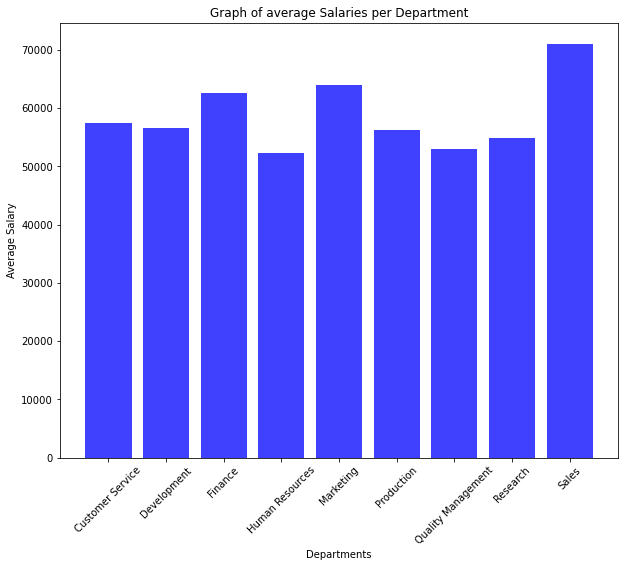

In [53]:
# Set the figure size and the rotation of the ticks on the x axis
fig= plt.figure(figsize=(10,8))
plt.xticks(rotation=45 )

# x axis is the list of departments
x_axis = df['name'].unique()

# get the mean of the salaries
y_axis = df_sal['salary'].mean()

# Label the graph properly
plt.title("Graph of average Salaries per Department")
plt.xlabel("Departments")
plt.ylabel("Average Salary")

# Plot the bar graph
plt.bar(x_axis, y_axis, facecolor="blue", alpha=0.75, align="center")

plt.show